# 07 군집화 (Clustering)

## 01 K-평균 알고리즘 이해

### 군집화

+ 데이터 포인트들을 별개의 군집으로 그룹화 하는 것을 의미
+ 유사성이 높은 데이터들을 동일한 그룹으로 분류하고 서로 다른 군집들이 상이성을 가지도록 그룹화한다.

<img width="400" alt="image" src="http://www.tcpschool.com/lectures/img_deeplearning_06_clustering.png">


### 군집화 활용 분야
+ 고객, 마켓, 브랜드, 사회 경제 활동 세분화(Segmentation)
+ Image 검출, 세분화, 트랙킹
+ 이상 검출 (Abnomaly detection)

### 군집화 알고리즘
+ K-Means
+ Mean Shift
+ Gaussian Mixture Model
+ DBSCAN

### K-Means Clustering 

+ 군집 중심점(centroid) 기반 클러스터링
+ K-means clustering 동작 과정

<img width="500" alt="image" src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FIzYb3%2FbtqyWWJ6pRR%2FfLbSvEKc7ncHp18dMLtcIK%2Fimg.png">

1. 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓는다. 전체 데이터를 3개로 군집화하려면 3개의 중심을 임의의 위치에 가져다 놓는다.

2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속된다.

<img width="500" alt="image" src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdl53k5%2FbtqySsYwtNv%2F6Yd5kpKS4KN7FO6h95AJn0%2Fimg.png">

3. 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동한다. 

4-1. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경한다.


<img width="500" alt="image" src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FKZwKX%2FbtqyUK49PIv%2Fpz8uFW6TxKPYLkTTAc4IkK%2Fimg.png">

중심점 이동과 클러스터 할당을 반복

<img width="500" alt="image" src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbOdu7N%2FbtqyTk0hrsL%2FOTet3D6KqHb6W00N8xX3J0%2Fimg.png">

5. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료한다. 그렇지 않다면 다시 4번 과정을 거쳐서 소속을 변경하고 이 과정을 반복한다.

### K-Means의 장점과 단점

+ 장점
  + 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
  + 알고리즘이 쉽고 간결하다.
  + 대용량 데이터에도 활용이 가능하다.
+ 단점
  + 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다. (이를 위해 PCA로 차원 감소를 적용해야 할 수도 있다.)
  + 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.
  + 이상치(Outlier) 데이터에 취약하다.
  + 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어렵다.

### 사이킷런 KMeans 클래스

사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공한다. K-Means 클래스는 다음과 같은 초기화 파라미터를 가지고 있다.

_class sklearn.cluster.Kmeans(n_clusters=8, int='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')_

+ 주요 파라미터
  + KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미한다.
  + init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정한다.
  + amx_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.

+ 주요 속성
  + labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블이다.
  + cluster_centers_ : 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있다.

---------------
### K-평균을 이용한 붓꽃 데이터 세트 군집화

붓꽃의 꽃받침(sepal)과 꽃잎(petal) 길이와 너비에 따른 품종을 분류하는 데이터 세트이다. 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해 보고, 이를 분류 값과 비교해본다.

In [54]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
print('target names', iris.target_names)

irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

target names ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


붓꽃 데이터 세트를 3개 그룹으로 군집화한다.

In [55]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [56]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [57]:
kmeans.fit_predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [58]:
# 각각의 행이 가지는 좌표값 반환 (	Compute clustering and transform X to cluster-distance space )
kmeans.fit_transform(irisDF)

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

군집화 결과를 irisDF에 'culster'컬럼으로 추가하고 target값과 결과 비교

In [59]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
irisDF.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [60]:
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


2차원 평면상에서 개별 데이터의 군집화를 시각적으로 표현하기 위해 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X 좌표, Y좌표로 개별 데이터를 표현하도록 한다.

KeyError: 'pca_x'

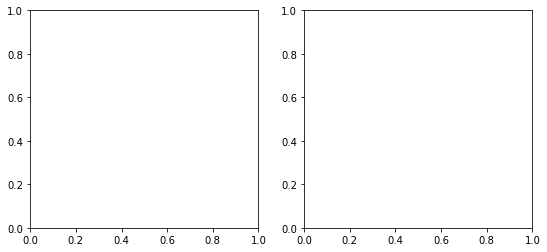

In [61]:
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)

# 원래 타겟 변수 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['target']==0].index
marker1_ind = irisDF[irisDF['target']==1].index
marker2_ind = irisDF[irisDF['target']==2].index

# 원래 타겟 변수 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출
ax1.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
ax1.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
ax1.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_title('Original cluster by 2 PCA Components')

# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출
ax2.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
ax2.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
ax2.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 2')
ax2.set_title('K-means clustring by 2 PCA Components')


cluster 1을 나타내는 네모(square, 'S')는 명확히 다른 군집과 잘 분리돼 있다. cluster 0와 cluster 2은 상당 수준 분리돼 있지만, 네모만큼 명확하게는 분리돼 있지 않음을 알 수 있다.

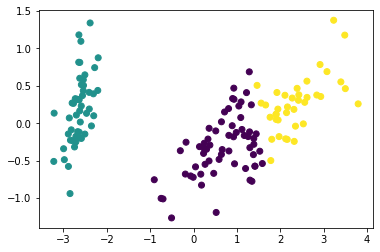

In [ ]:
# cluster를 컬러별로 구분해서 시각화하기

plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:,'pca_y'], c=irisDF['cluster'])

------------
### 군집화 알고리즘 테스트를 위한 데이터 생성

사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해 보기 위한 간단한 데이터 생성기를 제공한다. 재표적인 군집화용 데이터 생성기로는 make_blobs()와 make_classification() API가 있다. 

둘 중에 어떤 것을 사용하든 큰 차이가 없지만 
+ make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가
+ make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용

이 외에 make_circle(), make_moon() API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용된다.


__make_blobs()의 간략한 사용법__

make_blobs()를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플(Tuple)로 반환된다.

+ make_blobs()의 호출 파라미터
  + n_samples : 생성할 총 데이터의 개수이다. 디폴트는 100개이다.
  + n_features : 데이터의 피처 개수이다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x좌표, 두 번째 피처는 y좌표상에 표현한다.
  + centers : int값, 예를 들어 3으로 설정하면 군집의 개수를 나타낸다.그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미한다.
  + cluster_std : 생성될 군집 데이터의 표준 편차를 의미한다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어진다. [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만든다. 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 200개의 래코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)


# np.unique(array) : 중복없이 array의 원소 값 출력
# np.unique(array, return_counts=True) : array의 각 원소값 별 개수를 세어준다.

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
# 데이터프레임으로 만들어 살펴보기

import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(10)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
5,-0.908302,1.970778,2
6,2.472119,0.437033,1
7,1.656842,2.441289,1
8,1.077800,4.625379,0
9,-1.679427,2.602003,2


타깃값 0,1,2에 따라 마커를 다르게 해서 산점도 그려보기

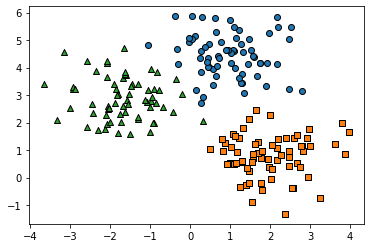

In [ ]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', 
                marker=markers[target] )
plt.show()

만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화해 본다.

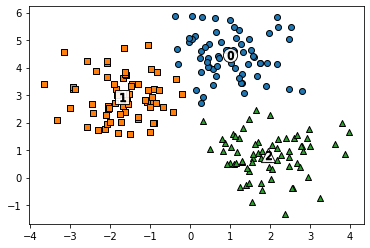

In [ ]:
# KMeans 객체를 이용하여 make_blobs()의 피처 데이터 세트인 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )

    center_x_y = centers[label]
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
